<a href="https://colab.research.google.com/github/katgoodman/kat/blob/main/Copy_of_Capstone_3_Sephora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background on Dataset 

Link to dataset origin: https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website/version/1

It was collected by Raghad Adalharbi for their Data Science Immersive Course with General Assembly

kaggle datasets download -d raghadalharbi/all-products-available-on-sephora-website

Background on Sephora: Sephora is a French retailer of personal care and beauty products. Customers can leave reviews for products and also place a heart next to a product they want. (move to markdown in code down below) These hearts are *loves*. Ratings for products range from 1.0 to 5.0. (Summarize business questions in general question from proposal, explain what you are going to do)

# Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import pandas and read in our GDrive-mounted csv

import pandas as pd

sephora_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/sephora_updated.csv')
sephora_df.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,URL,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,https://www.sephora.com/product/blu-mediterran...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,https://www.sephora.com/product/colonia-P16360...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,https://www.sephora.com/product/blu-mediterran...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,https://www.sephora.com/product/colonia-miniat...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


# Data Wrangling & Checking for Nulls

In [ ]:
sephora_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [ ]:
sephora_df.shape

(9168, 21)

In [ ]:
sephora_df.dtypes

id                          int64
brand                      object
category                   object
name                       object
size                       object
rating                    float64
number_of_reviews           int64
love                        int64
price                     float64
value_price               float64
URL                        object
MarketingFlags               bool
MarketingFlags_content     object
options                    object
details                    object
how_to_use                 object
ingredients                object
online_only                 int64
exclusive                   int64
limited_edition             int64
limited_time_offer          int64
dtype: object

In [ ]:
sephora_df.isnull().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [ ]:
#Filter out columns that are not going to be used 
sephora_df_drop = sephora_df.drop(['id', 'URL', 'details', 'ingredients'], axis=1)
sephora_df_drop.head()

,brand,category,name,size,rating,number_of_reviews,love,price,value_price,MarketingFlags,MarketingFlags_content,options,how_to_use,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,True,online only,no options,Suggested Usage:-Fragrance is intensified by t...,1,0,0,0
1,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,no instructions,1,0,0,0
2,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,no instructions,1,0,0,0
3,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,no instructions,1,0,0,0
4,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,True,online only,no options,Suggested Usage:-Fragrance is intensified by t...,1,0,0,0


In [ ]:
#Dropping products that have no ratings
sephora_df_new = sephora_df_drop[sephora_df_drop['rating']>0]
sephora_df_new.rating.unique()

array([4. , 4.5, 3.5, 5. , 3. , 2.5, 2. , 1. , 1.5])

In [ ]:
#Explore each category type for products in dataset 
pd.set_option('display.max_rows', 500)
sephora_df_new.category.value_counts()
#This showcases which are the most populated type in categories

Perfume                            656
Moisturizers                       442
Face Serums                        378
Value & Gift Sets                  316
Face Wash & Cleansers              245
Face Masks                         226
Rollerballs & Travel Size          220
Hair Styling Products              213
Eye Palettes                       199
Eye Creams & Treatments            189
Lipstick                           188
Shampoo                            176
Face Brushes                       176
Foundation                         163
Highlighter                        161
Cologne                            154
Mascara                            153
Face Primer                        143
Mini Size                          141
Conditioner                        139
Candles & Home Scents              127
Eyeliner                           123
Setting Spray & Powder             115
Body Lotions & Body Oils           108
Makeup                             108
Beauty Supplements       

# Data Exploration and Visulizations

In [ ]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
#it is set to ignore warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#First, let's find the median and max of price for a hypothesis 
sephora_df_new['price'].describe()



count    8770.000000
mean       49.820007
std        46.877433
min         2.000000
25%        24.000000
50%        35.000000
75%        58.000000
max       549.000000
Name: price, dtype: float64

In [ ]:
#Ask Scott about the quantile because I cannot remember why to use it
#sephora_df_new['price'].quantile(0.95)

139.0

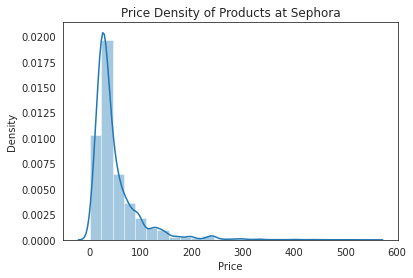

In [ ]:
#Remove price outliers. There is an item that was close to $2000 in price

sns.distplot(x=sephora_df_new['price'], bins=25)
plt.title('Price Density of Products at Sephora')
plt.xlabel('Price')
#plt.ylabel('Y')
plt.show() 

Explain what you see: Most of the prices range from 0 - 250. There is a 

In [ ]:
#Change to love 
sephora_df_new['number_of_reviews'].describe()

count     8770.000000
mean       294.877879
std        908.554062
min          1.000000
25%         13.000000
50%         53.000000
75%        224.000000
max      19000.000000
Name: number_of_reviews, dtype: float64

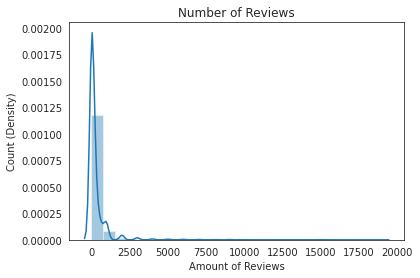

In [ ]:
#change quantile to here 
sephora_remove_review_outliers = sephora_df_new[sephora_df_new ['number_of_reviews'] <= 19000]
sns.distplot(x=sephora_remove_review_outliers['number_of_reviews'], bins=25)
plt.title('Number of Reviews')
plt.xlabel('Amount of Reviews')
plt.ylabel('Count (Density)')
plt.show()

#Hypothesis 1: I hypothesize that there is a correlation between products with higher *ratings* and the amount of *love* received from customers


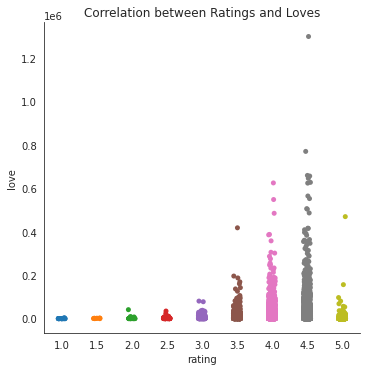

In [ ]:
#The average ratings is situated between 3.5 to 5.0
sns.catplot (x = sephora_df_new["rating"], y = sephora_df_new ["love"], data = sephora_df_new, jitter = True)
plt.title('Correlation between Ratings and Loves')
plt.show()

In [ ]:
from scipy import stats
stats.pearsonr(sephora_df_new['rating'], sephora_df_new['love'])

(0.05454359350811281, 3.204746547757709e-07)

There is a positive and significant coorelation between *rating* and *love*

# Hypothesis 2: I hypothesize that items priced lower than 50 USD are rated higher than items that are priced higher than 50 USD

In [ ]:
#Remember, the average or mean for price is close to 50 USD
sephora_df_new['price'].describe()

count    8770.000000
mean       49.820007
std        46.877433
min         2.000000
25%        24.000000
50%        35.000000
75%        58.000000
max       549.000000
Name: price, dtype: float64

In [ ]:
#First,seperate items that are priced lower than 50
#We end up with 6084 items that are less than 50 USD
lower_priced_products = sephora_df_new[['price', 'rating']].iloc[(sephora_df_new['price']<50.0).values]
lower_priced_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6084 entries, 40 to 9163
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   6084 non-null   float64
 1   rating  6084 non-null   float64
dtypes: float64(2)
memory usage: 142.6 KB


In [ ]:
#Second, seperate items that are priced higher than $50
#There are 2582 products that 
higher_priced_products = sephora_df_new[['price', 'rating']].iloc[(sephora_df_new['price']>50.0).values]
higher_priced_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2582 entries, 0 to 9149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2582 non-null   float64
 1   rating  2582 non-null   float64
dtypes: float64(2)
memory usage: 60.5 KB


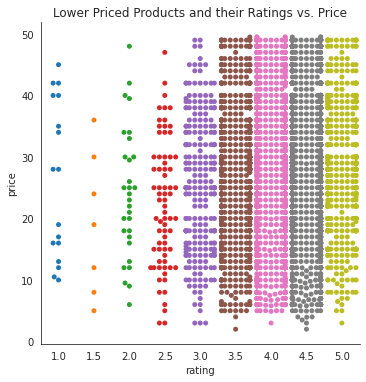

In [ ]:
#Using a Categorical plot, we can see that lower priced products have an average rating between 3.0 to 5.0

sns.catplot(x = lower_priced_products ["rating"], y = lower_priced_products ["price"], kind = "swarm", data = sephora_df_new)
plt.title ('Lower Priced Products and their Ratings vs. Price')
plt.show()

In [ ]:
df_lower = lower_priced_products.groupby('rating').nunique()
df_lower[df.index >= 4.0]
#Products rated higher than 4.0 total 232

,price
rating,
4.0,85
4.5,92
5.0,55


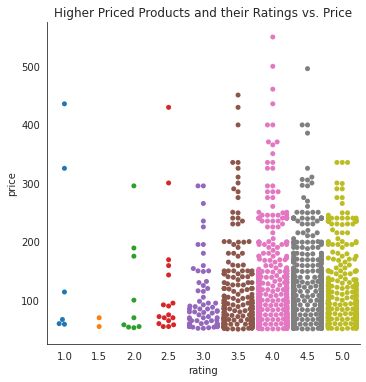

In [ ]:
sns.catplot(x = higher_priced_products ["rating"], y = higher_priced_products ["price"], kind = "swarm", data = sephora_df_new)
plt.title ('Higher Priced Products and their Ratings vs. Price')
plt.show()
#change to bar chart 

In [ ]:
df_higher = higher_priced_products.groupby('rating').nunique()
df_higher[df.index >= 4.0]
#Products rated higher than 4.0 total 351

,price
rating,
4.0,120
4.5,129
5.0,102


In [ ]:
#do a describe for each dataframe 
lower_priced_products.rating.describe()

count    6084.000000
mean        4.133876
std         0.556404
min         1.000000
25%         4.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [ ]:
higher_priced_products.rating.describe()

count    2582.000000
mean        4.255035
std         0.538092
min         1.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

In [ ]:
stats.ttest_ind(lower_priced_products['rating'], higher_priced_products['rating'])

Ttest_indResult(statistic=-9.361772474849795, pvalue=9.82109928933006e-21)

The p-value is less than 0.5 which means there is statistical signifigance between the lower priced products and higher priced products. But it's that higher priced products have higher ratings. 

# Hypothesis 3: I hypothesize that there are more loves for face makeup products versus fragrance products. Face products excludes lip & eye products. 


In [ ]:
#First, let's remember each category for products offered 
sephora_df_new.category.unique()

array(['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist',
       'Body Lotions & Body Oils', 'Body Sprays & Deodorant',
       'Perfume Gift Sets', 'Rollerballs & Travel Size',
       'Lip Balm & Treatment', 'Lotions & Oils', 'Eye Palettes',
       'Highlighter', 'Cheek Palettes', 'Lipstick', 'Face Serums',
       'Moisturizers', 'Value & Gift Sets', 'Eye Creams & Treatments',
       'Face Sunscreen', 'Lip Balms & Treatments', 'Face Masks',
       'Face Wash & Cleansers', 'Decollete & Neck Creams', 'Face Oils',
       'Hand Cream & Foot Cream', 'Face Primer', 'Color Correct',
       'Mists & Essences', 'Tinted Moisturizer', 'Concealer',
       'Beauty Supplements', 'Facial Peels', 'Mini Size', 'Exfoliators',
       'Conditioner', 'Shampoo', 'Hair Styling Products',
       'Scalp & Hair Treatments', 'Hair Masks', 'Hair Spray', 'Hair Oil',
       'Hair Primers', 'Dry Shampoo', 'Hair', 'Hair Thinning & Hair Loss',
       'Hair Straighteners & Flat Irons', 'Hair Dryers', 'Color Ca

In [ ]:
#Create a new dataframe for fragrance products which includes:
#Fragrance, Cologne, Perfume, Body Mist & Hair Mist, Body Lotions & Body Oils, 
#Body Sprays & Deodrants, Perfume Gift Sets, Rollerballs & Travel Size, After Shave, Deodorant & Antiperspirant

Fragrance_List = ['Fragrance','Cologne', 'Perfume', 'Body Mist & Hair Mist', 'Body Lotions & Body Oils','Body Sprays & Deodrants', 'Perfume Gift Sets', 'Rollerballs & Travel Size', 'After Shave','Deodorant & Antiperspirant']
sephora_fragrance = sephora_df_new[sephora_df_new['category'].isin(Fragrance_List)]
sephora_fragrance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 9159
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   1297 non-null   object 
 1   category                1297 non-null   object 
 2   name                    1297 non-null   object 
 3   size                    1297 non-null   object 
 4   rating                  1297 non-null   float64
 5   number_of_reviews       1297 non-null   int64  
 6   love                    1297 non-null   int64  
 7   price                   1297 non-null   float64
 8   value_price             1297 non-null   float64
 9   MarketingFlags          1297 non-null   bool   
 10  MarketingFlags_content  1297 non-null   object 
 11  options                 1297 non-null   object 
 12  how_to_use              1297 non-null   object 
 13  online_only             1297 non-null   int64  
 14  exclusive               1297 non-null   

In [ ]:
#Create another dataframe for face makeup products which includes:
#Eye Palettes, Highlighter, Cheek Palettes, Face Primer, Color Correct, Tinted Moisturizer, 
#Concealer, BB & CC Cream, Foundation, 
#Setting Spray & Powder, Contour, Bronzer, Blush, Makeup, Makeup Palettes
Face_List = ['Eye Palettes', 'Highlighter', 'Cheek Palettes', 'Face Primer', 'Color Correct', 'Tinted Moisturizer', 'Concealer', 'BB & CC Cream', 'Foundation', 'Setting Spray & Powder', 'Contour', 'Bronzer', 'Blush', 'Makeup', 'Makeup Palettes']
sephora_face = sephora_df_new[sephora_df_new['category'].isin(Face_List)]
sephora_face.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1226 entries, 57 to 9156
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   brand                   1226 non-null   object 
 1   category                1226 non-null   object 
 2   name                    1226 non-null   object 
 3   size                    1226 non-null   object 
 4   rating                  1226 non-null   float64
 5   number_of_reviews       1226 non-null   int64  
 6   love                    1226 non-null   int64  
 7   price                   1226 non-null   float64
 8   value_price             1226 non-null   float64
 9   MarketingFlags          1226 non-null   bool   
 10  MarketingFlags_content  1226 non-null   object 
 11  options                 1226 non-null   object 
 12  how_to_use              1226 non-null   object 
 13  online_only             1226 non-null   int64  
 14  exclusive               1226 non-null  

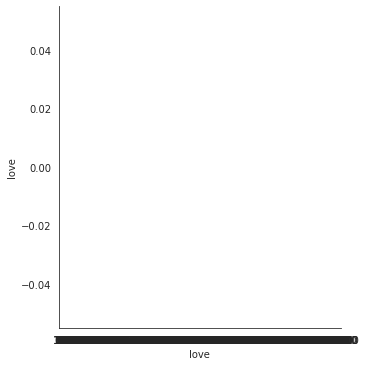

In [ ]:
sns.catplot(x = sephora_fragrance["love"], y = sephora_face["love"], jitter = False, data = sephora_df_new)
#plt.title ('Lower Priced Products and their Ratings vs. Price')
#plt.show()

# Hypothesis 4: I hypothesize that there is a statistical difference in price between items being offered online only versus items that can be picked up in stores
